<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np

In [2]:
# SSE(Sum of Squares for Error, 오차제곱합) 손실함수 구현
def sse(y, t):
    loss = np.sum((y - t) ** 2)
    return loss
    

# 정답에 근사했을 경우
y = np.array([0.1, 0.05, 0.6, 0., 0.05, 0.1, 0., 0.1, 0., 0,])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

loss = sse(y, t)
print(loss)

# 정답과 멀을 경우
y = np.array([0.1, 0.05, 0.6, 0., 0.05, 0.1, 0., 0.1, 0., 0,])
t = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

loss = sse(y, t)
print(loss)

0.19500000000000006
1.395


In [3]:
def cross_entropy(y, t):
    delta = 1e-7
    loss = -np.sum(t * np.log(y + delta))
    return loss

# 정답에 근사했을 경우
y = np.array([0.1, 0.05, 0.6, 0., 0.05, 0.1, 0., 0.1, 0., 0,])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

loss = cross_entropy(y, t)
print(loss)

# 정답과 멀을 경우
y = np.array([0.1, 0.05, 0.6, 0., 0.05, 0.1, 0., 0.1, 0., 0,])
t = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

loss = cross_entropy(y, t)
print(loss)

0.510825457099338
16.118095650958317


In [4]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a.size

9

In [5]:
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)
print(X_train.shape, y_train.shape)


(60000, 784) (60000, 10)


In [6]:
# 배치 사이즈만큼의 배치 데이터 추출
train_size = X_train.shape[0]
batch_size = 10
batch_index = np.random.choice(train_size, batch_size)

X_train_batch = X_train[batch_index]
y_train_batch = y_train[batch_index]
print(X_train_batch.shape, y_train_batch.shape)

(10, 784) (10, 10)


In [7]:
# 레이블이 원-핫 인코딩일 경우 CEE 손실함수
def cross_entropy_ohe(y, t):
    # 데이터가 1개만 들어왔을 경우(1차원) -> 2차원으로 변환
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    
    batch_size = y.shape[0]
    loss = -np.sum(t * np.log(y + 1e-7))
    return loss

In [8]:
from dataset.mnist import load_mnist
import pickle

(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=False)

def init_network():
    with open('/Users/younghun/Desktop/gitrepo/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    exp_x_sum = np.sum(exp_x)
    return exp_x / exp_x_sum

def forward(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.matmul(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.matmul(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.matmul(z2, w3) + b3
    y = softmax(a3)
    
    return y

batch_size = 10
batch_idx = np.random.choice(X_train.shape[0], batch_size)
X_batch = X_train[batch_idx]
y_batch = y_train[batch_idx]

network = init_network()
y_pred = forward(network, X_batch)

def cross_entropy(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    #print(y.shape, t.shape)                            # y는 2차원(원-핫인코딩) t는 1차원(레이블인코딩)
    #이해못했던 부분!)=> print(y[np.arange(batch_size), t]) # y값의 열 인덱스 번호 = t의 레이블 값임!
    loss = -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    return loss

loss = cross_entropy(y_pred, y_batch)
print(loss)

3.6020103454589845


- 블로깅 완료
---

In [33]:
# 수치미분 계산 공식(전방차분)) -> h를 0에 근사시키기 위해 가장 작은수를 사용했지만 아래의 h는 컴퓨터로 계산할 때 0으로 나오게 되어 오차가 발생
def numerical_diff_wrong(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

# 수치미분 계산 공식을 중심(중앙) 차분으로 변형 -> h를 2번 이용!
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

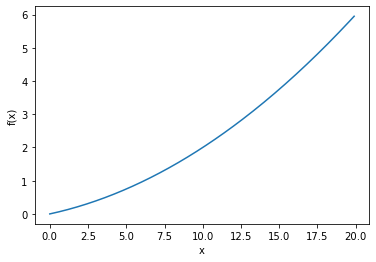

In [34]:
# 함수 하나 정의
def function_1(x):
    y = 0.01*x** 2 + 0.1*x
    return y

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0., 20., 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [35]:
# 위 함수의 미분 값 구하기
print(numerical_diff_wrong(function_1, 5))
print(numerical_diff_wrong(function_1, 10)) # 가장 미분값이 큼! = 가장 변화량이 큼
print()
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10)) # 가장 미분값이 큼! = 가장 변화량이 큼

0.0
0.0

0.1999999999990898
0.2999999999986347


-0.49999999999317346


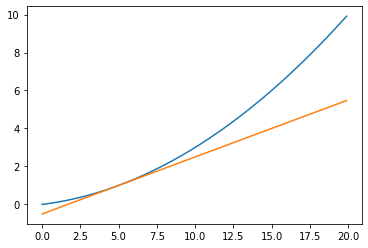

In [72]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

def function_1(x):
    y = 0.02*x**2 + 0.1*x
    return y

def target_line(f, x):
    # 변화량 계산
    d = numerical_diff(f, x)
    # 접선의 함수(일차함수)의 절편값
    y = f(x)
    b = y - d*x
    # 접선의 일차함수 식 ex) y = ax + b 처럼! -> 이 때, x값들은 바깥의 x값들을 넣어줌
    return lambda t: d*t + y
    
x = np.arange(0., 20., 0.1)
y = function_1(x)
plt.plot(x, y)

tf = target_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y2)
plt.show()

In [65]:
0.02 * 25

0.5

In [3]:
# 편미분 구현하기
# 1. 2차함수로 구성된 새로운 함수 정의
def function_2(x: np.array):
    return np.sum(x ** 2)

# 2. x0^2 + x1^2 이라는 함수가 있을 때, x0, x1 각각 편미분 수행하기
# 2-1. x0 기준으로 편미분 수행 = x1은 상수로 고정!
def square_func_temp1(x0):
    y = x0*x0 + 4.0**2 # x1을 4.0으로 고정
    return y

# 2-2. x1 기준으로 편미분 수행 = x0은 상수로 고정!
def square_func_temp2(x1):
    y = 3.0**2 + x1*x1 # x1을 3.0으로 고정
    return y

# 미분 함수
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x-h)) / (2*h)

# x0가 3일 때 h만큼 늘리면 f 값은 얼마나 변화했는가? 를 의미
print(numerical_diff(square_func_temp1, 3.0))

# x1이 4일 때 h만큼 늘리면 f 값은 얼마나 변화했는가? 를 의미
print(numerical_diff(square_func_temp2, 4.0))

5.999999981298743
8.000000004670937


In [12]:
# 여러가지 변수를 동시에 편미분 하는 방법 = 기울기(why? 여러 변수들의 편미분 값들을 벡터로 정리한 것이 Gradient라고 함!)
def function_2(x: np.array):
    return np.sum(x ** 2)

def numerical_gradient(f, x: np.array):
    h = 1e-4
    # Gradient 담을 벡터행렬 초기화
    grad = np.zeros_like(x)
    
    # array의 원소 하나씩 편미분 수행(=하나의 변수씩 편미분 수행)
    for idx in range(x.size):
        temp_val = x[idx]
        # f(x+h)
        x[idx] = temp_val + h
        fxh1 = f(x)  # x라는 전체 array를 넣는 이유는 f 값을 계산하기 위해서는 모든 x들(변수들)이 필요하니까!
        # f(x-h)
        x[idx] = temp_val - h
        fxh2 = f(x)
        # 미분 공식 수행
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = temp_val # 다른 변수의 편미분 수행해주기 위해서 -h/+h 했던 원소값을 복원
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([8.0, 10.0])))
print(numerical_gradient(function_2, np.array([-5.0, -3.0])))

[6. 8.]
[16. 20.]
[-10.  -6.]


In [33]:
# 경사하강법: 기울기(Gradient)를 활용하여 (손실)함수의 최솟값 또는 최댓값을 찾는 방법
def function_2(x: np.array):
    return np.sum(x**2)

def gradient_descent(f, init_x: np.array, lr=0.01, step_num=100):
    x = init_x
    # 100번의 경사하강 수행
    for _ in range(step_num):
        # (손실) 함수인 function_2 기반으로 기울기를 반복 계산
        grad = numerical_gradient(f, x)
        #print('grad:',grad) # 이 결과를 살펴보면 인풋인 init_x에 -3.0은 변화량이 주로 음수이기 때문에 양의 방향으로 변화시키는 반면, 4.0은 주로 양수이기 때문에 음의 방향으로 변화시킴
        # x값 업데이트
        x -= lr * grad
    return x

init_x = np.array([-3.0, 4.0])
# 결과값: 손실 함수 기반으로 변화량을 측정하여 init_x라는 파라미터들을 업데이트한 결과값
print(gradient_descent(function_2, init_x, lr=0.1, step_num=100)) 
print()
# 학습률 매우 크게 했을 경우 -> 발산
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num=100))
print()
# 학습률 매우 작게 했을 경우 -> 초기값에서 갱신이 거의 안됨!
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=1e-10, step_num=100))

[-6.11110793e-10  8.14814391e-10]

[-2.58983747e+13 -1.29524862e+12]

[-2.99999994  3.99999992]


In [5]:
# 신경망에서의 기울기(Gradient) 계산하기
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

# 다차원 배열에서의 편미분 구하는 함수
def numerical_gradient_me(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    # nditer는 array의 요소 하나하나 접근해 설정 로직에 따라 값을 알려줌!
    # 'multi_index'를 통해서 array 요소의 인덱스를 구할 수 있음
    # op_flags는 array의 요소들을 읽거나 변경하는 게 가능토록 명시
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    # it.finished는 마지막 인덱스까지 도달했으면 True, 아니면 False
    while not it.finished:
        idx = it.multi_index # 인덱스 하나하나 반환
        temp_val = x[idx]
        # f(x+h)
        x[idx] = float(temp_val) + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = float(temp_val) - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = temp_val # 복원
        # 다음 인덱스로 넘어가도록 하기
        it.iternext()
    return grad
        

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        y = np.matmul(x, self.W)
        return y
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])  # 레이블은 최종 출력 shape인 (3,)이랑 같아야 함
print('Loss:', net.loss(x, t))
print()
# 손실함수를 기반으로 변수들(파라미터들)의 기울기 계산하기!
f = lambda w: net.loss(x, t)  # w는 그냥 람다 정의하기 위한 용 arg임!
net = SimpleNet()
dw = numerical_gradient_me(f, net.W)
print(dw)

Loss: 1.2858931129543199

[[ 0.36032908  0.13325883 -0.49358791]
 [ 0.54049362  0.19988825 -0.74038187]]
